In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from itertools import cycle, islice
import csv 
csvfile = "Zsample10.csv"
zillow_df = pd.read_csv(csvfile)

In [2]:
zillow_df.head()

,parcelid,ac_type,bath,beds,bldg_qual,calc_bath,sqft,calc_sqft,fips,garage,...,regionzip,rooms,units,yearbuilt,tax_structure,tax_total,assessment_yr,tax_land,tax_bill_ayr,tractblk
0,14104290,0,1.5,2,0,1.5,0,1008,6059,2,...,97047,5,0,1965,48367,321014,2016,272647,4125.88,6.059090e+13
1,12170245,0,1.0,2,6,1.0,0,1500,6037,0,...,96265,0,1,1948,134826,674131,2016,539305,8003.98,6.037460e+13
2,17224583,0,3.5,4,0,3.5,1356,3071,6111,2,...,96385,11,0,1977,450356,900712,2016,450356,9497.78,6.111010e+13
3,10920939,0,1.0,3,4,1.0,0,1134,6037,0,...,96375,0,1,1950,116449,487319,2016,370870,5853.33,6.037100e+13
4,14455839,13,2.0,3,0,2.0,0,1410,6059,2,...,96996,6,0,1970,47884,86445,2016,38561,893.48,6.059030e+13


In [3]:
countyLA = zillow_df.loc[zillow_df["fips"] == 6037]
countyOC = zillow_df.loc[zillow_df["fips"] == 6059]
countyVC = zillow_df.loc[zillow_df["fips"] == 6111]

In [4]:
counties = zillow_df.set_index(["fips"])

In [5]:
countiesRenamed = counties.rename({6037: "Los Angeles", 6059: "Orange County", 6111: "Ventura County"})

In [6]:
#countyLAData = countyLA.rename({6037: "Los Angeles"})
losAngelesData = countyLA.set_index(["fips"])
losAngelesDataRenamed = losAngelesData.rename({6037: "Los Angeles"})

In [7]:
orangeCountyData = countyOC.set_index(["fips"])
orangeCountyDataRenamed = orangeCountyData.rename({6059: "Orange County"})

In [8]:
venturaCountyData = countyVC.set_index(["fips"])
venturaCountyDataRenamed = venturaCountyData.rename({6111: "Ventura County"})

In [9]:
averageSquareFeetLA = losAngelesDataRenamed.groupby("fips")["calc_sqft"].mean()

In [10]:
averageSquareFeetOC = orangeCountyDataRenamed.groupby("fips")["calc_sqft"].mean()

In [11]:
averageSquareFeetVC = venturaCountyDataRenamed.groupby("fips")["calc_sqft"].mean()

In [12]:
avgLA = countiesRenamed.groupby("fips")["calc_sqft"].mean()

In [13]:
squareFeet_df = pd.DataFrame({"Average Sq Ft Per County": avgLA})
newSquareFeet_df = squareFeet_df[(squareFeet_df.T !=0).any()]
newSquareFeet_df

,Average Sq Ft Per County
fips,
Los Angeles,1785.172927
Orange County,1851.068749
Ventura County,1829.452139


## Average Square Feet

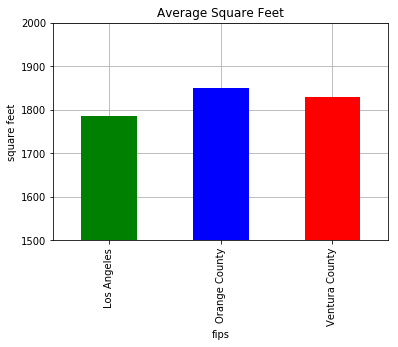

In [14]:
squareFootChart = newSquareFeet_df.plot(kind='bar', zorder=3, yticks=range(0,2018,100), legend=False, color=tuple(["g","b","r"]))
squareFootChart.set_ylabel("square feet")
plt.title("Average Square Feet")
squareFootChart.grid()
squareFootChart.set_ylim(1500)
plt.savefig("AverageSquareFeet.png")

In [15]:
losAngelesBeds = losAngelesDataRenamed["beds"].mean()

In [16]:
orangeCountyBeds = orangeCountyDataRenamed["beds"].mean()

In [17]:
venturaCountyBeds = venturaCountyDataRenamed["beds"].mean()

In [18]:
avgBedLA = countiesRenamed.groupby("fips")["beds"].mean()

In [19]:
bedrooms_df = pd.DataFrame({"Average Number of Bedrooms per County": avgBedLA})
newBedrooms_df = bedrooms_df[(bedrooms_df.T !=0).any()]
newBedrooms_df

,Average Number of Bedrooms per County
fips,
Los Angeles,3.105097
Orange County,3.064674
Ventura County,3.090588


# Average Number of Bedrooms in Each County

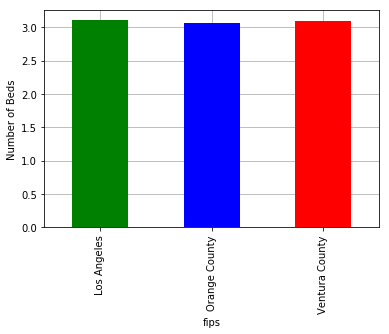

In [20]:
#colors = list(islice(cycle(["r", 'r', "y"]), None, len(newBedrooms_df)))
bedroomChart = newBedrooms_df.plot(kind='bar', legend=False, align='center', zorder=3, color=tuple(["g","b","r"]))
bedroomChart.set_ylabel("Number of Beds")
bedroomChart.grid()
plt.savefig("AverageBedroomsPerCounty.png")

In [21]:
priceLA = losAngelesDataRenamed.groupby("fips")["tax_total"].sum()
sumOfSqFtLA = losAngelesDataRenamed.groupby("fips")["calc_sqft"].sum()
pricePerFtLA = priceLA / sumOfSqFtLA

In [22]:
priceOC = orangeCountyDataRenamed.groupby("fips")["tax_total"].sum()
sumOfSqFtOC = orangeCountyDataRenamed.groupby("fips")["calc_sqft"].sum()
pricePerFtOC = priceOC / sumOfSqFtOC

In [23]:
priceVC = venturaCountyDataRenamed.groupby("fips")["tax_total"].sum()
sumOfSqFtVC = venturaCountyDataRenamed.groupby("fips")["calc_sqft"].sum()
pricePerFtVC = priceVC / sumOfSqFtVC

In [24]:
priceFinal = countiesRenamed.groupby("fips")["calc_sqft"].mean()

In [25]:
price_df = pd.DataFrame({"Square Foot Price": priceFinal})
newPrice_df = price_df[(price_df.T !=0).any()]
newPrice_df

,Square Foot Price
fips,
Los Angeles,1785.172927
Orange County,1851.068749
Ventura County,1829.452139


# Average Price Per Square Foot

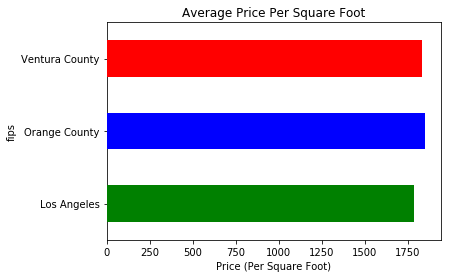

In [26]:
squareFtChart = newPrice_df.plot(kind='barh', legend=False, zorder=3, yticks=range(1000,2000,50), color=tuple(["g","b","r"]))
plt.title("Average Price Per Square Foot")
plt.xlabel("Price (Per Square Foot)")
plt.savefig("AveragePricePerSquareFoot")

In [27]:
yearBuiltLA = losAngelesDataRenamed.groupby("fips")["yearbuilt"].mean()

In [28]:
yearBuiltOC = orangeCountyDataRenamed.groupby("fips")["yearbuilt"].mean()

In [29]:
yearBuiltVC = venturaCountyDataRenamed.groupby("fips")["yearbuilt"].mean()

In [30]:
houseAge = countiesRenamed.groupby("fips")["yearbuilt"].mean()

In [31]:
houseAge_df = pd.DataFrame({"Average Home Built (Year)": houseAge})
newHouseAge_df = houseAge_df[(houseAge_df.T !=0).any()]
newHouseAge_df

,Average Home Built (Year)
fips,
Los Angeles,1946.846492
Orange County,1903.639429
Ventura County,1933.909590


Beverly Hills (90210)
-1956 Paul Trousdale develops Trousdale Estates (Same year Elvis writes "Heartbreak Hotel")
This neighborhood ends up becoming home to Elvis, Frank Sinatra, Dean Martin, eventually Richard Nixon

# Average Home Built (Year)

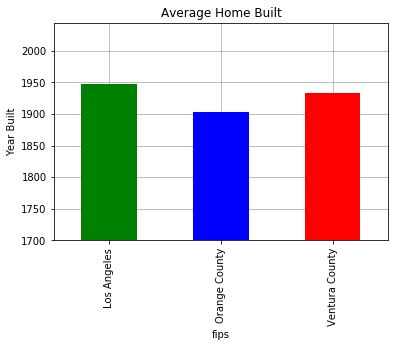

In [32]:
homeAgeChart = newHouseAge_df.plot(kind='bar', legend=False, zorder=3, yticks=range(100,2018,50), color=tuple(["g","b","r"]))
plt.title("Average Home Built")
plt.ylabel("Year Built")
plt.grid()
homeAgeChart.set_ylim(1700)
plt.savefig("AverageHomeBuiltYear.png")

In [33]:
losAngelesDataRenamed.head()

,parcelid,ac_type,bath,beds,bldg_qual,calc_bath,sqft,calc_sqft,garage,lat,...,regionzip,rooms,units,yearbuilt,tax_structure,tax_total,assessment_yr,tax_land,tax_bill_ayr,tractblk
fips,,,,,,,,,,,,,,,,,,,,,
Los Angeles,12170245,0,1.0,2,6,1.0,0,1500,0,34181148,...,96265,0,1,1948,134826,674131,2016,539305,8003.98,6.037460e+13
Los Angeles,10920939,0,1.0,3,4,1.0,0,1134,0,34223699,...,96375,0,1,1950,116449,487319,2016,370870,5853.33,6.037100e+13
Los Angeles,12675737,0,1.0,3,4,1.0,0,1115,0,33851790,...,96161,0,1,1955,146000,730000,2016,584000,8401.82,6.037650e+13
Los Angeles,11636544,1,7.0,5,12,7.0,0,6234,0,34081702,...,96086,0,1,1988,2013890,5961283,2016,3947393,69388.28,6.037700e+13
Los Angeles,13016979,0,1.0,1,4,1.0,0,608,0,34131530,...,96464,0,1,1948,43713,159153,2016,115440,2114.47,6.037400e+13


In [34]:
binsLA = [0,1949, 2018]
groupNames = ["Before 1950", "After 1950"]

In [35]:
zillow_df["Building Summary"] = pd.cut(zillow_df["yearbuilt"], binsLA, labels=groupNames)

In [36]:
finalPlot = zillow_df.groupby("Building Summary")

In [37]:
big_df = zillow_df[["fips", "yearbuilt", "Building Summary"]]

In [43]:
final_df = big_df.set_index(["fips"])
anotherFinal_df = final_df.rename({6037: "Los Angeles", 6059: "Orange County", 6111: "Ventura County"})

In [ ]:
#ageSummary = anotherFinal_df.plot(kind='bar')
ageSummary = anotherFinal_df.plot(kind='bar', legend=False, zorder=3)
plt.title("Building Summary")
plt.ylabel("Year Built")
plt.grid()
#ageSummary.set_ylim(1700)
plt.savefig("AverageHomeBuiltYear.png")

KeyboardInterrupt: 

In [37]:
#isThisADF = zillow_df.set_index(["fips"])

In [38]:
#final_df = isThisADF.rename({6037: "Los Angeles", 6059: "Orange County", 6111: "Ventura County"})

In [39]:
#zillow_df